# Plot the retrieved motifs

In [41]:
import numpy as np
from matplotlib import pyplot as plt
import os
from os.path import isfile, join
from itertools import compress
import itertools
import pandas as pd
import seaborn as sns

In [22]:
l = 3 #l_A=l_B=3 nucleotides
l_p = 3 #persistence length is 3 nucleotides 

In [23]:
def generate_kmer_inx():
    vals = {'A':0,'C':1,'G':2,'T':3}
    #vals = {0:'A', 1:'C', 2:'G', 3:'T'}
    kmer_inx = {}
    for p in list(itertools.product(vals.keys(), repeat=l)):
        inx = 0
        for j,base in enumerate(p):
            inx += (4**j)*vals[base] 
        kmer_inx[''.join(p)] = inx
    return kmer_inx

In [26]:
kmer_inx = generate_kmer_inx()
inx_kmer = {y:x for x,y in kmer_inx.items()}

### read files

In [213]:
param_dir = 'param'
keyw = 'KHDRBS2_0t4_1000'
param_files = [f for f in os.listdir(param_dir) if isfile(join(param_dir, f))]

to_pick = [keyw in s for s in param_files]
param_files = list(compress(param_files, to_pick))

adam_files = ['ADAM' in s for s in param_files]
adam_files = list(compress(param_files, adam_files))

lbfgs_files = ['LBFGS' in s for s in param_files]
lbfgs_files = list(compress(param_files, lbfgs_files))

In [214]:
def read_params(files):
    params = []
    for f in files:
        param = np.loadtxt(join(param_dir, f))
        param[-3:] = np.exp(param[-3:])

        params.append(param)
        
    return params

In [215]:
print('number of files: %d'%len(adam_files))
adam_params = read_params(adam_files)

number of files: 8


### plotting

In [216]:
colnames = [inx_kmer[i] for i in range(len(inx_kmer))] + [inx_kmer[i] for i in range(len(inx_kmer))] + ['sf', 'D', 'sig']

In [217]:
data = pd.DataFrame(adam_params, columns=colnames)
core1 = data.iloc[:,:64]
core1 = core1.loc[:,core1.median().sort_values().index]
core2 = data.iloc[:,64:128]
core2 = core2.loc[:,core2.median().sort_values().index]

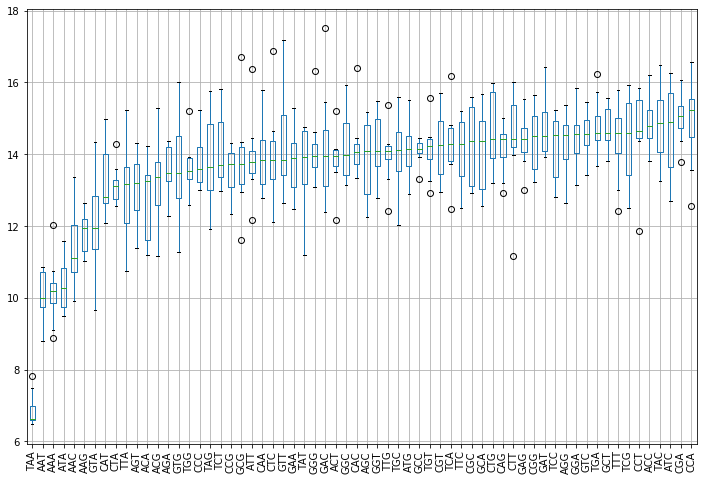

In [218]:
core1.boxplot(figsize=(12,8), rot=90)
#plt.ylim((5,20))

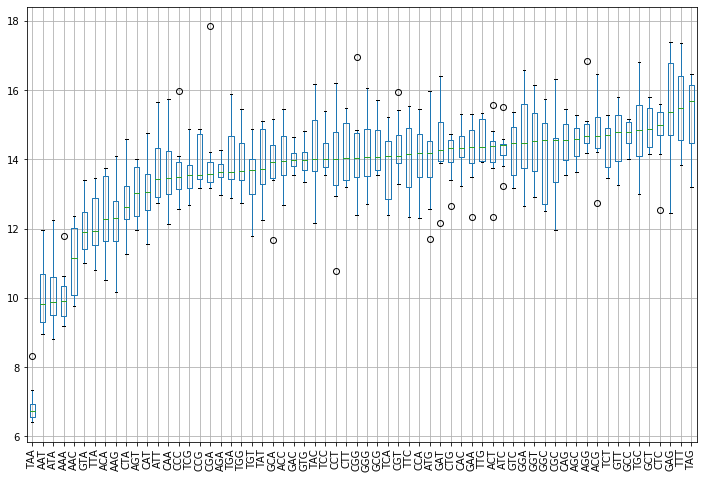

In [219]:
core2.boxplot(figsize=(12,8), rot=90)
#plt.ylim((5,20))

Text(0.5, 1.0, 'sig')

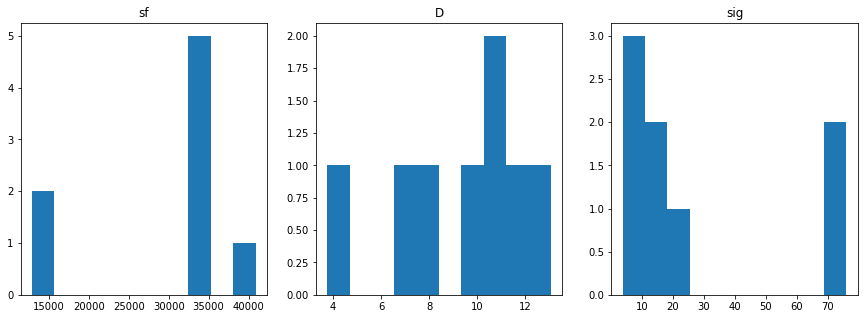

In [220]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

x1 = ax1.hist(data['sf'])
ax1.set_title('sf')

x2 = ax2.hist(data['D'])
ax2.set_title('D')

x3 = ax3.hist(data['sig'])
ax3.set_title('sig')

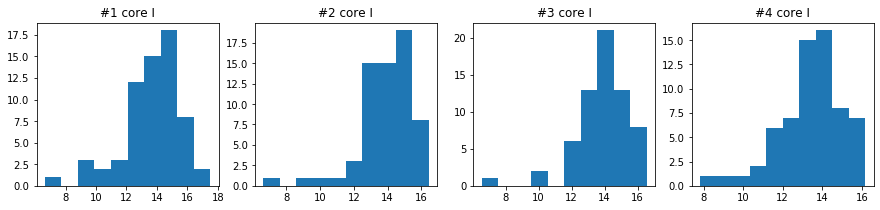

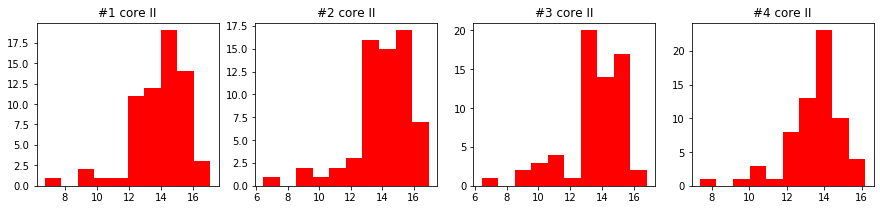

In [221]:
fig, axes = plt.subplots(1,4, figsize=(15,3))
for i in range(4):
    axes[i].hist(data.iloc[i,:64])
    axes[i].set_title('#%d core I'%(i+1))
    
fig, axes = plt.subplots(1,4, figsize=(15,3))
for i in range(4):
    axes[i].hist(data.iloc[i,64:128], color='red')
    axes[i].set_title('#%d core II'%(i+1))